In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [4]:
try:
  df = pd.read_csv('USA_Housing.csv')
except Exception as e:
  print(e)



In [5]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [8]:
print("\nDataset shape:")
df.shape


Dataset shape:


(5000, 7)

In [6]:
print("\nDataset Statistics:")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [9]:
print("\nDataset Info")
df.info()


Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [12]:
print(df.isnull().sum())

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64


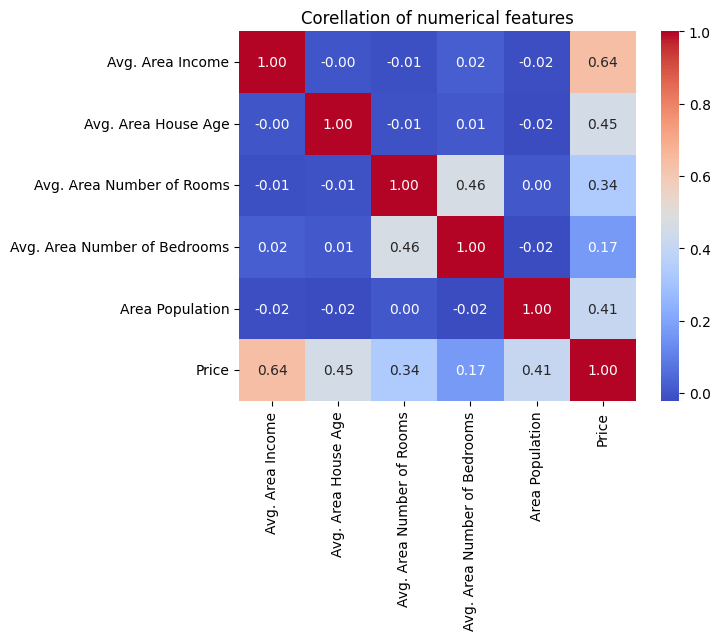

In [20]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Corellation of numerical features")
plt.show()

Text(0.5, 1.0, 'Avg. Area Income vs. Price')

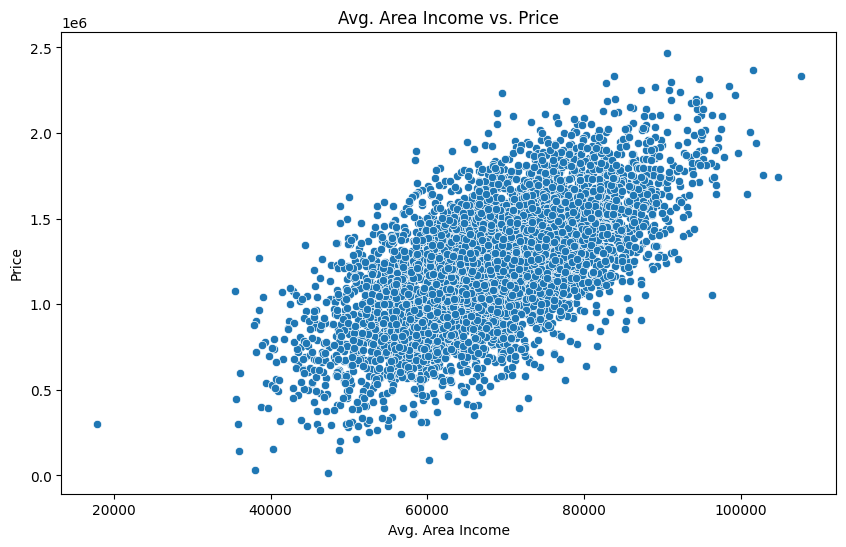

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Avg. Area Income",y="Price",data=df)
plt.xlabel("Avg. Area Income")
plt.ylabel("Price")
plt.title("Avg. Area Income vs. Price")

In [26]:
X = df[['Avg. Area Income']]

In [27]:
Y = df["Price"]

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

In [30]:
print("Training Set shape:")
print(X_train.shape)
print("Training Set shape:")
print(X_test.shape)

Training Set shape:
(4000, 1)
Training Set shape:
(1000, 1)


In [31]:
model = LinearRegression()
model.fit(X_train, Y_train)
print("Model Trained")

Model Trained


In [32]:
prediction = model.predict(X_test)

In [33]:
MAE = mean_absolute_error(Y_test, prediction)
MSE = mean_squared_error(Y_test, prediction)
RMSE = np.sqrt(MSE)
R2 = r2_score(Y_test, prediction)

In [34]:
print("Evaluation Matrices:")
print(f"Mean Absolute Error (MAE): {MAE}")
print(f"Mean Squared Error (MSE): {MSE}")
print(f"Root Mean Squared Error (RMSE): {RMSE}")
print(f"R-squared (R2): {R2}")

Evaluation Matrices:
Mean Absolute Error (MAE): 216826.35309989064
Mean Squared Error (MSE): 74194887058.66
Root Mean Squared Error (RMSE): 272387.38417676394
R-squared (R2): 0.39694865192619766


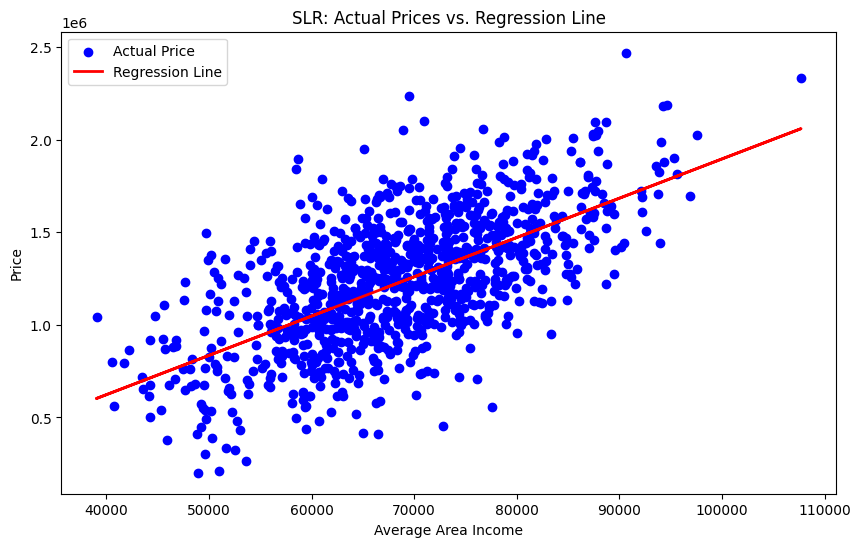

In [41]:
plt.figure(figsize=(10, 6))

plt.scatter(X_test, Y_test, color='blue', label='Actual Price')

plt.plot(X_test, prediction, color='red', linewidth=2, label='Regression Line')

plt.title('SLR: Actual Prices vs. Regression Line')
plt.xlabel('Average Area Income')
plt.ylabel('Price')
plt.legend()
plt.show()

In [43]:
print("SLR Model Parameters")
print(f"Coefficient (Slope): {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

print(f"\nInterpretation: A $1 increase in 'Avg. Area Income' is associated with a ${model.coef_[0]:.2f} increase in 'Price'.")

SLR Model Parameters
Coefficient (Slope): 21.21
Intercept: -225053.70

Interpretation: A $1 increase in 'Avg. Area Income' is associated with a $21.21 increase in 'Price'.


In [44]:
X_mlr = df.drop(['Price', 'Address'], axis=1)

y = df['Price']

X_train_mlr, X_test_mlr, y_train_mlr, y_test_mlr = train_test_split(
    X_mlr, y, test_size=0.3, random_state=42
)

print(f"MLR Training set shape: {X_train_mlr.shape}")
print(f"MLR Testing set shape: {X_test_mlr.shape}")

MLR Training set shape: (3500, 5)
MLR Testing set shape: (1500, 5)


In [46]:
mlr_model = LinearRegression()


In [47]:
mlr_model.fit(X_train_mlr, y_train_mlr)
print("Multiple Linear Regression model trained.")

Multiple Linear Regression model trained.


In [48]:
y_pred_mlr = mlr_model.predict(X_test_mlr)

In [49]:
mae_mlr = mean_absolute_error(y_test_mlr, y_pred_mlr)
mse_mlr = mean_squared_error(y_test_mlr, y_pred_mlr)
rmse_mlr = np.sqrt(mse_mlr)
r2_mlr = r2_score(y_test_mlr, y_pred_mlr)

In [50]:
print("Multiple Linear Regression Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae_mlr}")
print(f"Mean Squared Error (MSE): {mse_mlr}")
print(f"Root Mean Squared Error (RMSE): {rmse_mlr}")
print(f"R^2 (R^2): {r2_mlr}")

Multiple Linear Regression Evaluation Metrics:
Mean Absolute Error (MAE): 81135.5660933687
Mean Squared Error (MSE): 10068422551.400827
Root Mean Squared Error (RMSE): 100341.5295448541
R^2 (R^2): 0.914681849875402


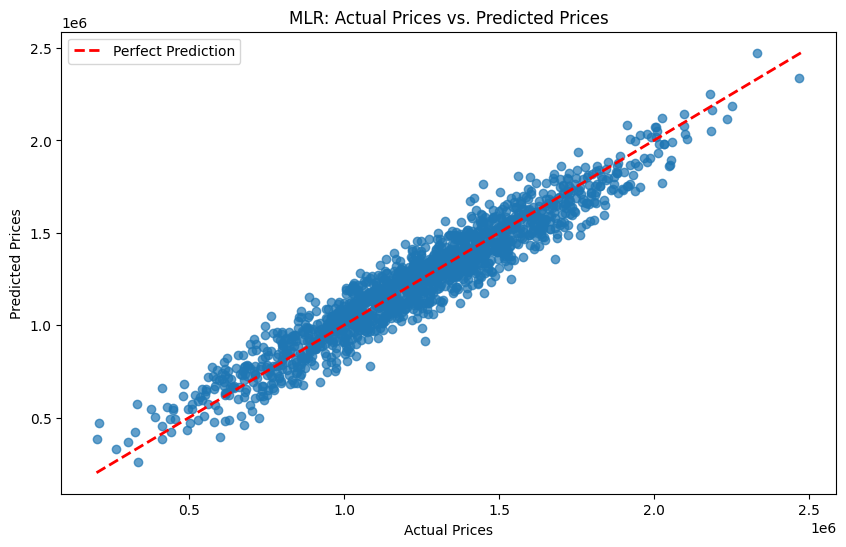

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_mlr, y_pred_mlr, alpha=0.7)

min_val = min(y_test_mlr.min(), y_pred_mlr.min())
max_val = max(y_test_mlr.max(), y_pred_mlr.max())

plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')

plt.title('MLR: Actual Prices vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

Intercept: -2638673.43

Coefficients:
                                Coefficient
Avg. Area Income                  21.625799
Avg. Area House Age           165590.392746
Avg. Area Number of Rooms     119827.783390
Avg. Area Number of Bedrooms    2361.095262
Area Population                   15.216581


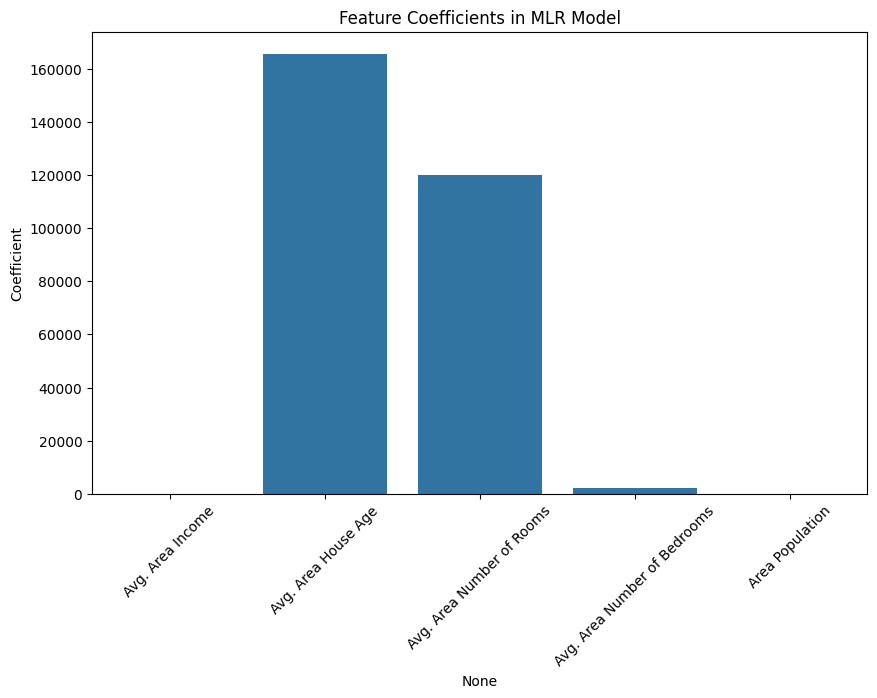

In [52]:
print(f"Intercept: {mlr_model.intercept_:.2f}")

coefficients = pd.DataFrame(mlr_model.coef_, X_mlr.columns, columns=['Coefficient'])
print("\nCoefficients:")
print(coefficients)

plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients.index, y='Coefficient', data=coefficients)
plt.title('Feature Coefficients in MLR Model')
plt.xticks(rotation=45)
plt.show()

In [54]:
metrics_data = {
    'SLR (Income Only)': [MAE, MSE, RMSE, R2],
    'MLR (All Features)': [mae_mlr, mse_mlr, rmse_mlr, r2_mlr]
}

comparison_df = pd.DataFrame(metrics_data, index=['MAE', 'MSE', 'RMSE', 'R² Score'])

print("Model Performance Comparison")
print(comparison_df.to_markdown(floatfmt=".2f"))

r2_improvement = r2_mlr - R2
print(f"\nImprovement in R² Score (MLR vs SLR): {r2_improvement:.4f} (or {r2_improvement*100:.2f}%)")

Model Performance Comparison
|          |   SLR (Income Only) |   MLR (All Features) |
|:---------|--------------------:|---------------------:|
| MAE      |           216826.35 |             81135.57 |
| MSE      |      74194887058.66 |       10068422551.40 |
| RMSE     |           272387.38 |            100341.53 |
| R² Score |                0.40 |                 0.91 |

Improvement in R² Score (MLR vs SLR): 0.5177 (or 51.77%)


**Bonus Questions**

1. What does the R² score tell you about model performance?
**bold text**

The R-squared (R²) score measures the proportion of the variance in the dependent variable (in this case, Price) that is predictable from the independent variable(s) (the features).

It ranges from 0 to 1 (or 0% to 100%).

An R² of 0 means the model explains none of the variability.

An R² of 1 means the model explains all of the variability.

Calculated by:
R² = 1 – (Model Error / Total Error)

2. Why does Multiple Linear Regression perform better than Simple Linear Regression?
**bold text**

Multiple Linear Regression (MLR) performs better because a house's price is a complex outcome that depends on multiple factors, not just one.

SLR: Used only income. That is insufficient to predict the price.

MLR: Used multiple factors. By considering all factors together, the model gets a much more complete and accurate picture. Increasing the performance of model

3. Which feature has the strongest influence on house prices?


Based on the heatmap, 'Avg. Area Income' (with a correlation of 0.64) has the strongest influence on house prices.

**4. What are some limitations of linear regression for this problem?**

Linear regression assumes the relationship between each feature and the price is a straight line. Similarly linear regression is sesative to outliers a few houses with high prices can affect the prediction of other